In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [9]:
SOIL_DIR='/prj/GREENHOUSE/SOIL_PROPERTIES/datasets/England_Wales_Soil_Data/LDE16_12_SRUC_Tarsitano/'
#infile=SOIL_DIR+'Merged_Soil_Composition_CHESSgrid.nc'
infile_tag=SOIL_DIR+'EnW_Soil_WeightedCompositionProperties_CHESSgrid_'
LU_types=['PG','AR','OT','LE']
params=['sand','silt','clay']

In [10]:

FULL_DATA_DICT={}
for LU in LU_types:
    FULL_DATA_DICT[LU]={}
    print(infile_tag+'_'+LU+'.nc')
    inf=nc.Dataset(infile_tag+LU+'.nc','r')
    for var in inf.variables:
        FULL_DATA_DICT[LU][var]=inf.variables[var][:]
    inf.close()



/prj/GREENHOUSE/SOIL_PROPERTIES/datasets/England_Wales_Soil_Data/LDE16_12_SRUC_Tarsitano/EnW_Soil_WeightedCompositionProperties_CHESSgrid__PG.nc
/prj/GREENHOUSE/SOIL_PROPERTIES/datasets/England_Wales_Soil_Data/LDE16_12_SRUC_Tarsitano/EnW_Soil_WeightedCompositionProperties_CHESSgrid__AR.nc
/prj/GREENHOUSE/SOIL_PROPERTIES/datasets/England_Wales_Soil_Data/LDE16_12_SRUC_Tarsitano/EnW_Soil_WeightedCompositionProperties_CHESSgrid__OT.nc
/prj/GREENHOUSE/SOIL_PROPERTIES/datasets/England_Wales_Soil_Data/LDE16_12_SRUC_Tarsitano/EnW_Soil_WeightedCompositionProperties_CHESSgrid__LE.nc


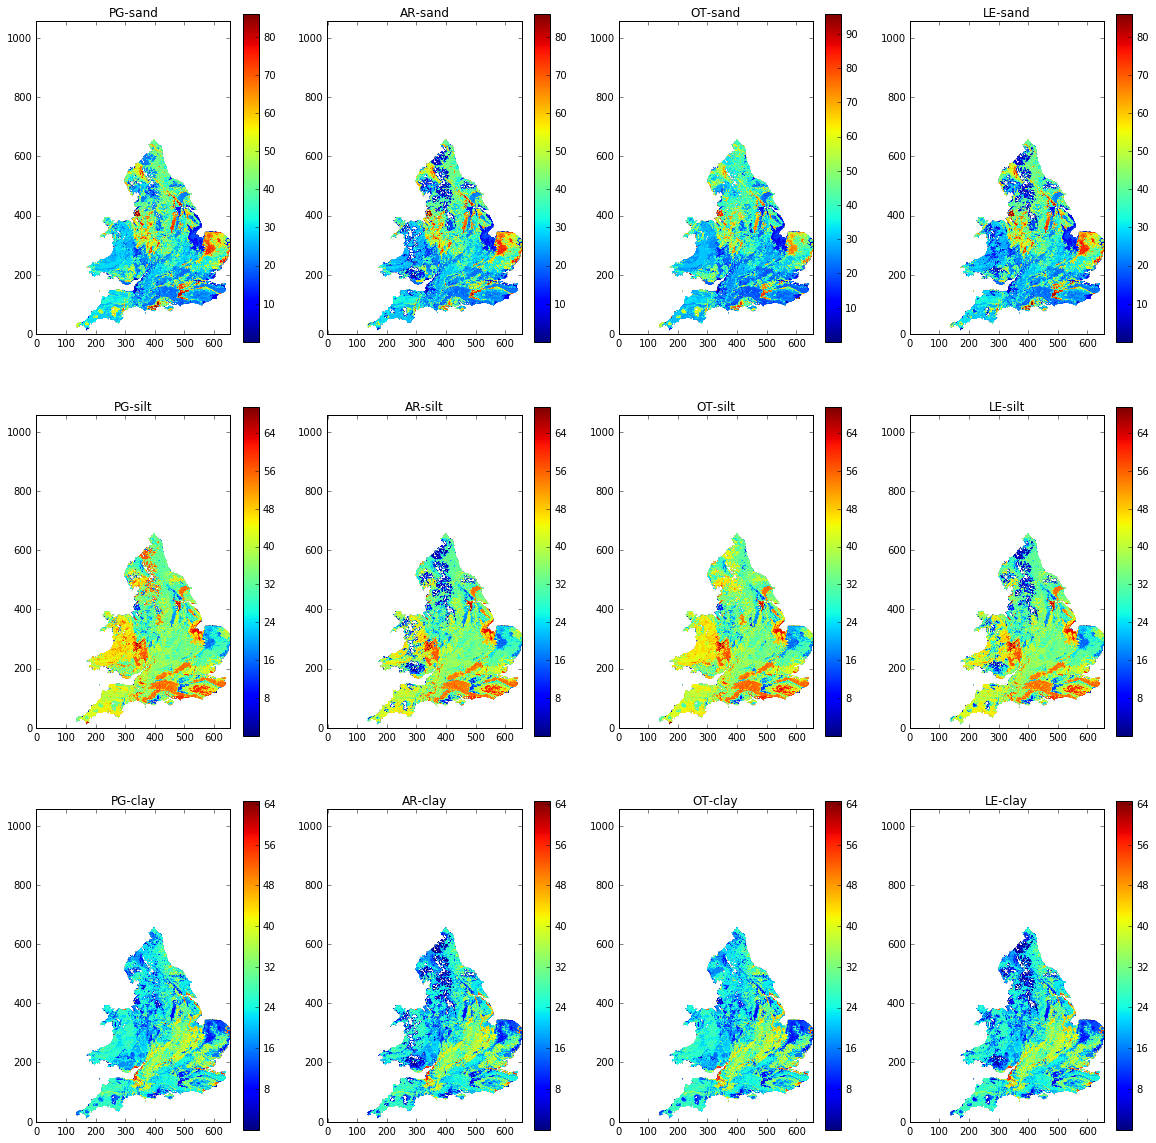

In [13]:
plt.figure(figsize=(20,20))
iplt=1
iSD=0
for param in params:
    for LU in LU_types:
        plt.subplot(len(params),len(LU_types),iplt)
        plt.imshow(FULL_DATA_DICT[LU][param][iSD,:],origin='bottom')
        plt.colorbar()
        plt.title(LU+'-'+param)
        iplt+=1

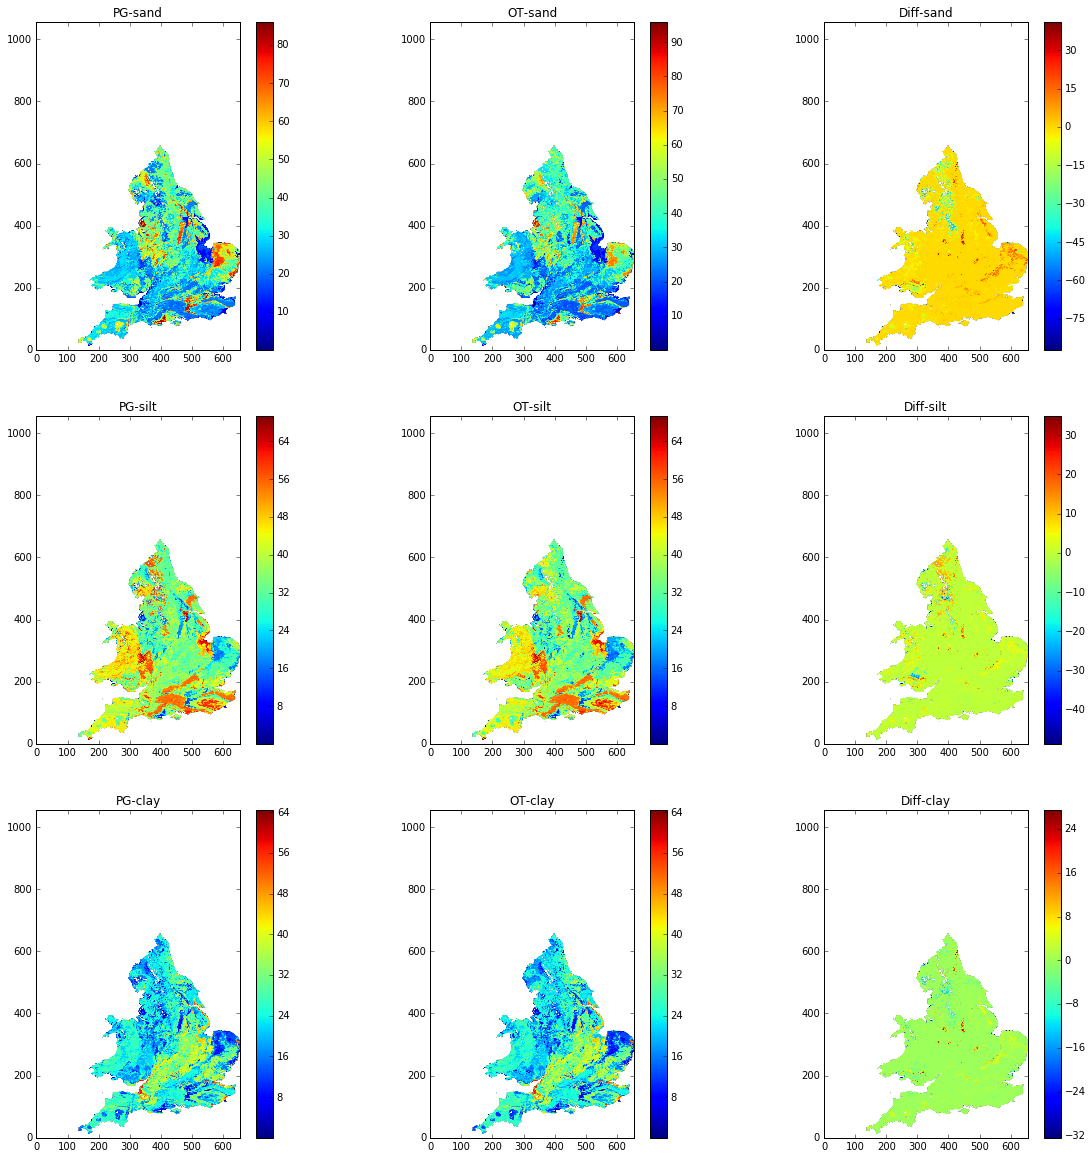

In [18]:
plt.figure(figsize=(20,20))
iplt=1
iSD=0
diff_LU=['PG','OT']
plt_LU_types=[diff_LU[0],diff_LU[1],'Diff']
plt_DATA_DICT={diff_LU[0]:FULL_DATA_DICT[diff_LU[0]], \
               diff_LU[1]:FULL_DATA_DICT[diff_LU[1]], \
               'Diff':{param:FULL_DATA_DICT[diff_LU[0]][param]-\
                             FULL_DATA_DICT[diff_LU[1]][param] \
                        for param in params}}
for param in params:
    for LU in plt_LU_types:
        plt.subplot(len(params),len(plt_LU_types),iplt)
        plt.imshow(plt_DATA_DICT[LU][param][iSD,:],origin='bottom')
        plt.colorbar()
        plt.title(LU+'-'+param)
        iplt+=1

In [ ]:
plot_vars=['sand', 'silt', 'clay', 'ph', 'carbon']
plot_vars=['hcon', 'bexp', 'hcap', 'sathh', 'satcon', 'sm_wilt', 'sm_sat', 'sm_crit']
#plot_vars=['hcon', 'oneovernminusone', 'hcap', 'oneoveralpha', 'ksat', 'sm_wilt', 'sm_sat', 'Soil_Texture'] #, 'sm_crit'
plot_dict={var:data_dict[var] for var in plot_vars}
yplts=2
xplts=int(np.ceil(float(len(plot_dict))/yplts))
iplt=1
plt.figure(figsize=(20,10))

#for var in plot_dict:
for var in ['hcap','hcon','bexp','sathh',\
            'satcon','sm_sat','sm_crit','sm_wilt']:
    plt.subplot(yplts,xplts,iplt)
    plt.imshow(plot_dict[var][0,:],origin='bottom')
    print(str(var))
    plt.colorbar()
    iplt+=1
    